In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# We don't use THRESHOLD_TEST.txt file, because it's samples taken from THRESHOLD_ALL.txt 
train_dataset = np.loadtxt("data/khasanshin/THRESHOLD_ALL.txt", delimiter=",")

In [4]:
# let`s see to 4-th column
X = train_dataset[:,0:600]
Y = train_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

In [5]:
# 4-th column = sum of 1,2,3 columns
x = X_train[1].reshape(4, 150)
xyz_sum = np.sum(x[:3, :], axis=0)
np.linalg.norm(xyz_sum - x[3])

0.06480740698407855

In [52]:
# no need for features linear combination 
X = train_dataset[:,0:450]
Y = train_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

In [7]:
# Выходной слой с 5 - прямой, боковой, апперкот, уракен, передвижения без ударов
num_classes = 5
names = ['прямой', 'боковой', 'апперкот', 'уракен', 'без ударов']

Take a look to the train and validation sets

(array([46., 49., 33., 46., 38.]),
 array([0, 1, 2, 3, 4, 5]),
 <BarContainer object of 5 artists>)

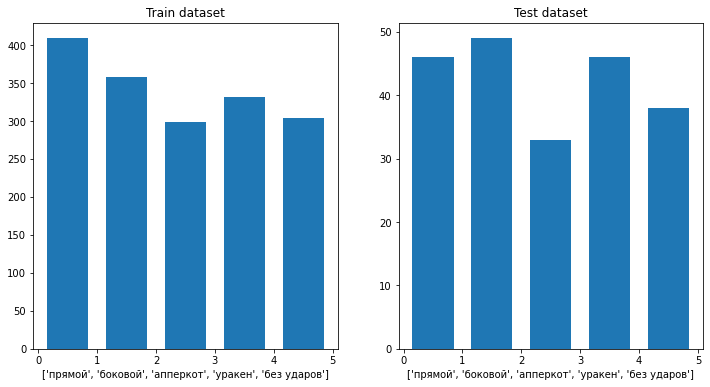

In [8]:
# TODO: make good x axis labels
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.xlabel(names)
plt.title('Train dataset')
plt.hist(y_train.astype(np.int), rwidth=0.7, bins=range(6), label=names )

plt.subplot(1, 2, 2)
plt.title('Test dataset')
plt.xlabel(names)
plt.hist(y_val.astype(np.int), rwidth=0.7, bins=range(6), label=names )

Visualize raw data

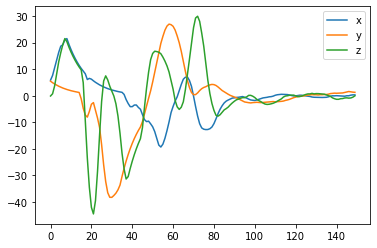

In [9]:
plt.plot(X[0].reshape(3, 150).T)
plt.legend(['x', 'y', 'z'])

# Simple multy layer perceptron

In [10]:
mlp = Sequential([
    Dense(450, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='sigmoid'),
    Dense(5, activation='sigmoid')
])

mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
plot_model(mlp)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [12]:
mlp_history = mlp.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=16,  verbose=1)

Epoch 1/100
107/107 [==============================] - 1s 7ms/step - loss: 1.1419 - accuracy: 0.5643 - val_loss: 0.6005 - val_accuracy: 0.8160
Epoch 2/100
107/107 [==============================] - 0s 4ms/step - loss: 0.4607 - accuracy: 0.8438 - val_loss: 0.3638 - val_accuracy: 0.8962
Epoch 3/100
107/107 [==============================] - 0s 4ms/step - loss: 0.2532 - accuracy: 0.9267 - val_loss: 0.3407 - val_accuracy: 0.8962
Epoch 4/100
107/107 [==============================] - 0s 4ms/step - loss: 0.2436 - accuracy: 0.9258 - val_loss: 0.3782 - val_accuracy: 0.8774
Epoch 5/100
107/107 [==============================] - 0s 4ms/step - loss: 0.1709 - accuracy: 0.9389 - val_loss: 0.3503 - val_accuracy: 0.9198
Epoch 6/100
107/107 [==============================] - 0s 4ms/step - loss: 0.1061 - accuracy: 0.9674 - val_loss: 0.3517 - val_accuracy: 0.9104
Epoch 7/100
107/107 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.9770 - val_loss: 0.3711 - val_accuracy: 0.9151

107/107 [==============================] - 0s 4ms/step - loss: 7.8327e-05 - accuracy: 1.0000 - val_loss: 0.4648 - val_accuracy: 0.9151
Epoch 58/100
107/107 [==============================] - 0s 4ms/step - loss: 7.4939e-05 - accuracy: 1.0000 - val_loss: 0.4662 - val_accuracy: 0.9151
Epoch 59/100
107/107 [==============================] - 0s 4ms/step - loss: 7.2521e-05 - accuracy: 1.0000 - val_loss: 0.4681 - val_accuracy: 0.9151
Epoch 60/100
107/107 [==============================] - 0s 4ms/step - loss: 6.2915e-05 - accuracy: 1.0000 - val_loss: 0.4692 - val_accuracy: 0.9151
Epoch 61/100
107/107 [==============================] - 0s 4ms/step - loss: 6.1228e-05 - accuracy: 1.0000 - val_loss: 0.4713 - val_accuracy: 0.9151
Epoch 62/100
107/107 [==============================] - 0s 4ms/step - loss: 5.9868e-05 - accuracy: 1.0000 - val_loss: 0.4753 - val_accuracy: 0.9151
Epoch 63/100
107/107 [==============================] - 0s 4ms/step - loss: 5.4158e-05 - accuracy: 1.0000 - val_loss: 0.4771 

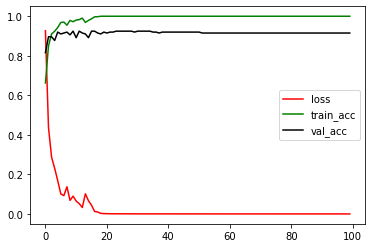

In [13]:
plt.plot(mlp_history.history['loss'],  color='red')
plt.plot(mlp_history.history['accuracy'],  color='green')
plt.plot(mlp_history.history['val_accuracy'], color='black')
plt.legend(['loss', 'train_acc', 'val_acc'])

Here we see difference between train and validation accuracy and small loss.  
This means, that linear model is overfitting. Let's try more complex model - convolution network.

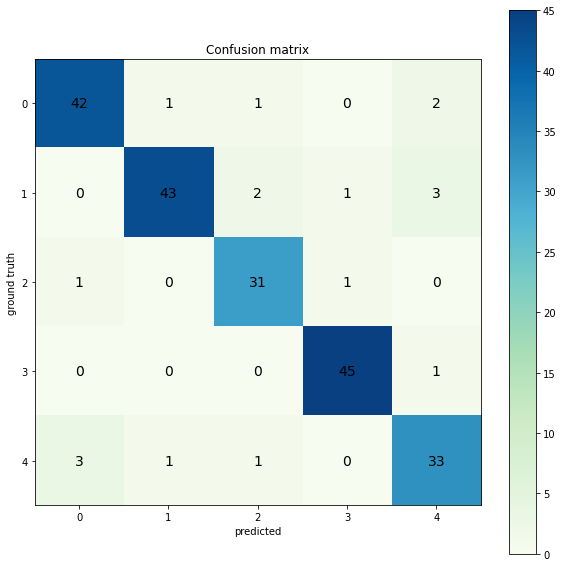

In [53]:
predictions = np.argmax(mlp.predict(X_val), axis=1)
gt = y_val.astype(np.int)
confusion_matrix = build_confusion_matrix(predictions, gt)
visualize_confusion_matrix(confusion_matrix)

In [54]:
mlp_metrics = calc_metrics(confusion_matrix)
mlp_metrics = pd.DataFrame(mlp_metrics)
mlp_metrics

,precision,recall,F1-score
0,0.913043,0.913043,0.913043
1,0.955556,0.877551,0.914894
2,0.885714,0.939394,0.911765
3,0.957447,0.978261,0.967742
4,0.846154,0.868421,0.857143


# Convolution Net from Keras tutorial

In [17]:
X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

In [18]:
conv_model_1 = Sequential([
    Input(X_train.shape[1:]),
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    GlobalAveragePooling1D(),
    Dense(num_classes, activation='sigmoid')
])

optim = optimizers.Adam(2e-3)

conv_model_1.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optim, metrics=['accuracy'])

In [19]:
history = conv_model_1.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    epochs=100, batch_size=64,  verbose=1)

Epoch 1/100
27/27 [==============================] - 2s 37ms/step - loss: 1.4950 - accuracy: 0.3922 - val_loss: 1.7031 - val_accuracy: 0.2689
Epoch 2/100
27/27 [==============================] - 1s 31ms/step - loss: 1.2090 - accuracy: 0.6012 - val_loss: 1.5290 - val_accuracy: 0.2547
Epoch 3/100
27/27 [==============================] - 1s 31ms/step - loss: 1.0993 - accuracy: 0.6278 - val_loss: 1.4390 - val_accuracy: 0.3208
Epoch 4/100
27/27 [==============================] - 1s 31ms/step - loss: 1.0183 - accuracy: 0.6412 - val_loss: 1.3486 - val_accuracy: 0.4057
Epoch 5/100
27/27 [==============================] - 1s 32ms/step - loss: 0.9524 - accuracy: 0.6788 - val_loss: 1.3016 - val_accuracy: 0.4623
Epoch 6/100
27/27 [==============================] - 1s 32ms/step - loss: 0.9114 - accuracy: 0.6724 - val_loss: 1.4469 - val_accuracy: 0.4623
Epoch 7/100
27/27 [==============================] - 1s 32ms/step - loss: 0.8613 - accuracy: 0.7073 - val_loss: 1.3433 - val_accuracy: 0.4575
Epoch 

27/27 [==============================] - 1s 31ms/step - loss: 0.4023 - accuracy: 0.8733 - val_loss: 0.6396 - val_accuracy: 0.7972
Epoch 59/100
27/27 [==============================] - 1s 31ms/step - loss: 0.3935 - accuracy: 0.8672 - val_loss: 0.5048 - val_accuracy: 0.8349
Epoch 60/100
27/27 [==============================] - 1s 31ms/step - loss: 0.3741 - accuracy: 0.8651 - val_loss: 0.6160 - val_accuracy: 0.7547
Epoch 61/100
27/27 [==============================] - 1s 31ms/step - loss: 0.4043 - accuracy: 0.8698 - val_loss: 0.7191 - val_accuracy: 0.7217
Epoch 62/100
27/27 [==============================] - 1s 31ms/step - loss: 0.3912 - accuracy: 0.8673 - val_loss: 0.4907 - val_accuracy: 0.8255
Epoch 63/100
27/27 [==============================] - 1s 31ms/step - loss: 0.3588 - accuracy: 0.8827 - val_loss: 0.5372 - val_accuracy: 0.8113
Epoch 64/100
27/27 [==============================] - 1s 31ms/step - loss: 0.3692 - accuracy: 0.8722 - val_loss: 0.8529 - val_accuracy: 0.7075
Epoch 65/100

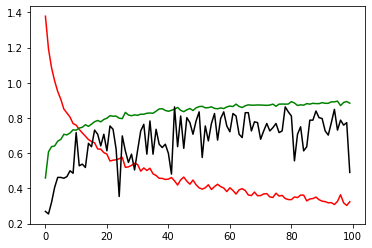

In [20]:
plt.plot(history.history['loss'],  color='red')
plt.plot(history.history['accuracy'],  color='green')
plt.plot(history.history['val_accuracy'], color='black')

Here we see big loss, low test accuracy and unstable predictions.  
Let's some tune network architechture.

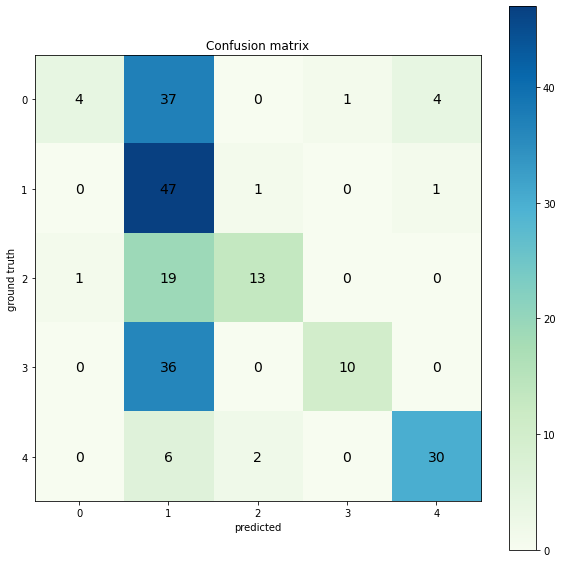

In [22]:
predictions = np.argmax(conv_model_1.predict(X_val), axis=1)
gt = y_val.astype(np.int)
confusion_matrix = build_confusion_matrix(predictions, gt)
visualize_confusion_matrix(confusion_matrix)

In [28]:
conv_metrics_1 = calc_metrics(confusion_matrix)
conv_metrics_1 = pd.DataFrame(conv_metrics_1)
conv_metrics_1

,precision,recall,F1-score
0,0.800000,0.086957,0.156863
1,0.324138,0.959184,0.484536
2,0.812500,0.393939,0.530612
3,0.909091,0.217391,0.350877
4,0.857143,0.789474,0.821918


# 2D Convolution Net with grid search hyperparameters

In [24]:
X = train_dataset[:,0:450]
Y = train_dataset[:,600]
X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

X_train = X_train.reshape(-1, 3, 150, 1)
X_val = X_val.reshape(-1, 3, 150, 1)

In [34]:
# best hyperparameters from grid search @see ConvNet_Grid_Search.ipynb
lr = 0.031623
n_filters_1 = 72
n_filters_2 = 88
kernel_size = 52
momentum = 0.99
batch_size = 80

In [33]:
conv_model_2 = Sequential([
        Input(X_train.shape[1:]),
        Conv2D(filters=n_filters_1, kernel_size=(2, kernel_size)),
        BatchNormalization(),
        ReLU(),

        Conv2D(filters=n_filters_2, kernel_size=2),
        BatchNormalization(),
        ReLU(),

        GlobalAveragePooling2D(),
        Dense(num_classes, activation='sigmoid')
    ])

optim = optimizers.SGD(lr, momentum)
    
conv_model_2.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optim, metrics=['accuracy'])

conv_history_2 = conv_model_2.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=batch_size)

Epoch 1/100
22/22 [==============================] - 1s 18ms/step - loss: 1.0521 - accuracy: 0.6124 - val_loss: 4.0294 - val_accuracy: 0.6557
Epoch 2/100
22/22 [==============================] - 0s 13ms/step - loss: 0.5161 - accuracy: 0.8366 - val_loss: 5.5594 - val_accuracy: 0.7217
Epoch 3/100
22/22 [==============================] - 0s 13ms/step - loss: 0.3951 - accuracy: 0.8610 - val_loss: 6.6845 - val_accuracy: 0.6368
Epoch 4/100
22/22 [==============================] - 0s 13ms/step - loss: 0.3002 - accuracy: 0.9057 - val_loss: 5.0780 - val_accuracy: 0.7123
Epoch 5/100
22/22 [==============================] - 0s 13ms/step - loss: 0.2706 - accuracy: 0.9111 - val_loss: 5.6273 - val_accuracy: 0.6415
Epoch 6/100
22/22 [==============================] - 0s 13ms/step - loss: 0.2461 - accuracy: 0.9098 - val_loss: 2.7533 - val_accuracy: 0.7642
Epoch 7/100
22/22 [==============================] - 0s 13ms/step - loss: 0.2613 - accuracy: 0.9061 - val_loss: 3.2687 - val_accuracy: 0.6887
Epoch 

22/22 [==============================] - 0s 13ms/step - loss: 0.0422 - accuracy: 0.9891 - val_loss: 0.1509 - val_accuracy: 0.9387
Epoch 59/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0510 - accuracy: 0.9858 - val_loss: 0.1026 - val_accuracy: 0.9575
Epoch 60/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0290 - accuracy: 0.9886 - val_loss: 0.0998 - val_accuracy: 0.9528
Epoch 61/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0419 - accuracy: 0.9850 - val_loss: 0.1167 - val_accuracy: 0.9528
Epoch 62/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0485 - accuracy: 0.9836 - val_loss: 0.1240 - val_accuracy: 0.9528
Epoch 63/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.1011 - val_accuracy: 0.9575
Epoch 64/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.9931 - val_loss: 0.1176 - val_accuracy: 0.9528
Epoch 65/100

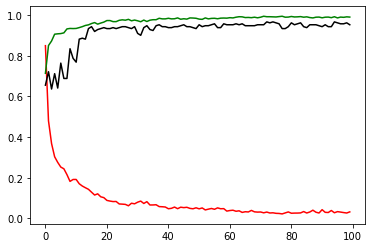

In [35]:
plt.plot(conv_history_2.history['loss'],  color='red')
plt.plot(conv_history_2.history['accuracy'],  color='green')
plt.plot(conv_history_2.history['val_accuracy'], color='black')

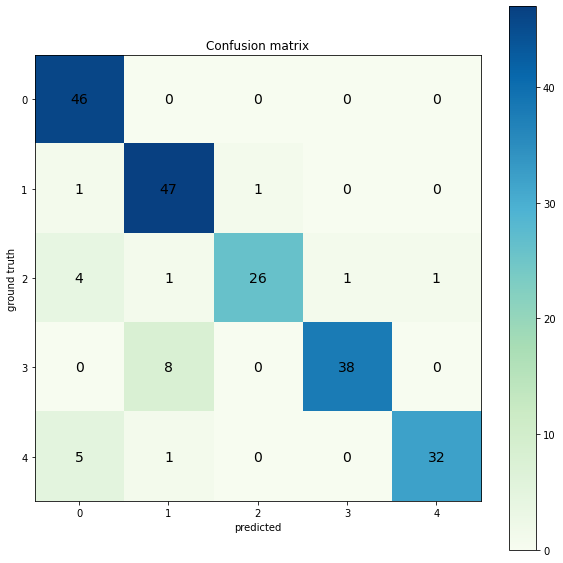

In [36]:
predictions = np.argmax(conv_model_2.predict(X_val), axis=1)
gt = y_val.astype(np.int)
confusion_matrix = build_confusion_matrix(predictions, gt)
visualize_confusion_matrix(confusion_matrix)

In [37]:
conv_metrics_2 = calc_metrics(confusion_matrix)
conv_metrics_2 = pd.DataFrame(conv_metrics_2)
conv_metrics_2

,precision,recall,F1-score
0,0.821429,1.000000,0.901961
1,0.824561,0.959184,0.886792
2,0.962963,0.787879,0.866667
3,0.974359,0.826087,0.894118
4,0.969697,0.842105,0.901408


# DEEPER 2D Convolution Net 

In [24]:
X = train_dataset[:,0:450]
Y = train_dataset[:,600]
X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

X_train = X_train.reshape(-1, 3, 150, 1)
X_val = X_val.reshape(-1, 3, 150, 1)

In [41]:
# RANDOM hyperparameters 
lr = 0.01
n_filters_1 = 64
n_filters_2 = 64
n_filters_3 = 64
kernel_size = 32
momentum = 0.99
batch_size = 64

In [47]:
conv_model_3 = Sequential([
        Input(X_train.shape[1:]),
        Conv2D(filters=n_filters_1, kernel_size=(2, kernel_size), padding="same" ),
        BatchNormalization(),
        ReLU(),

        Conv2D(filters=n_filters_2, kernel_size=2, padding="same"),
        BatchNormalization(),
        ReLU(),
    
        Conv2D(filters=n_filters_3, kernel_size=2),
        BatchNormalization(),
        ReLU(),

        GlobalAveragePooling2D(),
        Dense(num_classes, activation='sigmoid')
    ])

optim = optimizers.SGD(lr, momentum)
    
conv_model_3.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optim, metrics=['accuracy'])

conv_history_3 = conv_model_3.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=batch_size)

Epoch 1/100
27/27 [==============================] - 1s 36ms/step - loss: 1.4062 - accuracy: 0.4646 - val_loss: 2.6631 - val_accuracy: 0.2500
Epoch 2/100
27/27 [==============================] - 1s 32ms/step - loss: 0.8210 - accuracy: 0.7499 - val_loss: 3.7799 - val_accuracy: 0.4670
Epoch 3/100
27/27 [==============================] - 1s 31ms/step - loss: 0.5580 - accuracy: 0.8140 - val_loss: 6.0047 - val_accuracy: 0.4434
Epoch 4/100
27/27 [==============================] - 1s 32ms/step - loss: 0.3989 - accuracy: 0.8700 - val_loss: 7.1152 - val_accuracy: 0.4528
Epoch 5/100
27/27 [==============================] - 1s 31ms/step - loss: 0.3473 - accuracy: 0.8825 - val_loss: 4.3114 - val_accuracy: 0.6274
Epoch 6/100
27/27 [==============================] - 1s 31ms/step - loss: 0.3108 - accuracy: 0.8797 - val_loss: 6.1879 - val_accuracy: 0.4858
Epoch 7/100
27/27 [==============================] - 1s 31ms/step - loss: 0.2612 - accuracy: 0.9133 - val_loss: 2.8343 - val_accuracy: 0.7123
Epoch 

27/27 [==============================] - 1s 31ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0467 - val_accuracy: 0.9811
Epoch 59/100
27/27 [==============================] - 1s 31ms/step - loss: 0.0226 - accuracy: 0.9918 - val_loss: 0.0818 - val_accuracy: 0.9623
Epoch 60/100
27/27 [==============================] - 1s 31ms/step - loss: 0.0197 - accuracy: 0.9956 - val_loss: 0.0646 - val_accuracy: 0.9670
Epoch 61/100
27/27 [==============================] - 1s 31ms/step - loss: 0.0231 - accuracy: 0.9910 - val_loss: 0.0563 - val_accuracy: 0.9811
Epoch 62/100
27/27 [==============================] - 1s 31ms/step - loss: 0.0191 - accuracy: 0.9957 - val_loss: 0.0441 - val_accuracy: 0.9811
Epoch 63/100
27/27 [==============================] - 1s 32ms/step - loss: 0.0198 - accuracy: 0.9950 - val_loss: 0.0418 - val_accuracy: 0.9858
Epoch 64/100
27/27 [==============================] - 1s 31ms/step - loss: 0.0252 - accuracy: 0.9932 - val_loss: 0.0496 - val_accuracy: 0.9717
Epoch 65/100

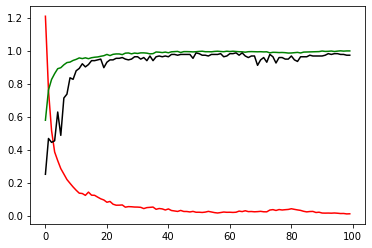

In [48]:
plt.plot(conv_history_3.history['loss'],  color='red')
plt.plot(conv_history_3.history['accuracy'],  color='green')
plt.plot(conv_history_3.history['val_accuracy'], color='black')

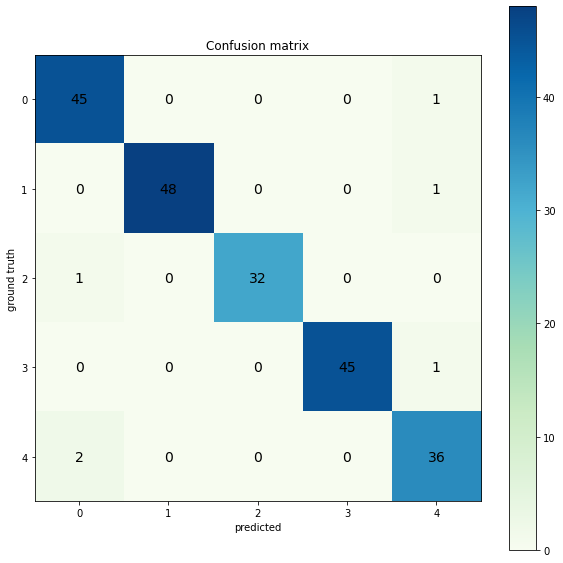

In [49]:
predictions = np.argmax(conv_model_3.predict(X_val), axis=1)
gt = y_val.astype(np.int)
confusion_matrix = build_confusion_matrix(predictions, gt)
visualize_confusion_matrix(confusion_matrix)

In [62]:
conv_metrics_3 = calc_metrics(confusion_matrix)
conv_metrics_3 = pd.DataFrame(conv_metrics_3)
conv_metrics_3

,precision,recall,F1-score
0,0.913043,0.913043,0.913043
1,0.955556,0.877551,0.914894
2,0.885714,0.939394,0.911765
3,0.957447,0.978261,0.967742
4,0.846154,0.868421,0.857143


In [63]:
# scores for all models and classes
pd.concat([mlp_metrics, conv_metrics_1, conv_metrics_2, conv_metrics_3], axis=1)

,precision,recall,F1-score,precision,recall,F1-score,precision,recall,F1-score,precision,recall,F1-score
0,0.913043,0.913043,0.913043,0.800000,0.086957,0.156863,0.821429,1.000000,0.901961,0.913043,0.913043,0.913043
1,0.955556,0.877551,0.914894,0.324138,0.959184,0.484536,0.824561,0.959184,0.886792,0.955556,0.877551,0.914894
2,0.885714,0.939394,0.911765,0.812500,0.393939,0.530612,0.962963,0.787879,0.866667,0.885714,0.939394,0.911765
3,0.957447,0.978261,0.967742,0.909091,0.217391,0.350877,0.974359,0.826087,0.894118,0.957447,0.978261,0.967742
4,0.846154,0.868421,0.857143,0.857143,0.789474,0.821918,0.969697,0.842105,0.901408,0.846154,0.868421,0.857143


In [60]:
# TODO comparision of models, do we need MORE DEEP models? YES!

In [ ]:
# TODO comparision with related works results

Comparing with classic ML prediction methods, neural nets have a little smaller F1-score, but higher accuracy.